# Learning curve plot - stable world

For any mouse and any selection of days (sessions) this script will plot learning curves of performance (per day) and as concatenated sliding window across trials. 
Performance metrics are average fraction of correct transitions (compared to a chance estimation based on lick rate at every landmark) per session and skip rate per landmark ABCD as a sliding window. 

In [34]:
from aeon.io.reader import Csv, Reader
import aeon.io.api as aeon
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import importlib as imp
import parse_bonsai_functions
imp.reload(parse_bonsai_functions)

<module 'parse_bonsai_functions' from '/Users/sandrareinert/Library/Mobile Documents/com~apple~CloudDocs/Documents/Postdoc_SWC/Code/Bonsai_ABCD/parse_bonsai_functions.py'>

In [ ]:
mouse_id = "010"
dates = ["20251204","20251205","20251206","20251207"] #just a few sample dates to test the scripts
root = "/Volumes/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/rawdata/"

In [33]:
num_rewards = []
av_performance = []
av_ctrl_performance = []
sliding_window_val = []
sliding_window_a = []
sliding_window_b = []
sliding_window_c = []
sliding_window_d = []
session_edges = []

for date in dates:
    session_path = parse_bonsai_functions.find_base_path(mouse_id, date, root)
    print("-----")
    print(f"Analysing session: {session_path}")

    #load settings and session files
    ses_settings, ses_rig_settings = parse_bonsai_functions.load_settings(session_path)
    sess_dataframe = parse_bonsai_functions.load_data(session_path)
    sess_dataframe = parse_bonsai_functions.threshold_lick_speed(sess_dataframe, ses_settings['velocityThreshold'])
    num_rewards.append(sess_dataframe['Rewards'].notna().sum())

    # parse_bonsai_functions.print_sess_summary(sess_dataframe,ses_settings)

    performance, perf_a, perf_b, perf_c, perf_d = parse_bonsai_functions.calc_stable_seq_fraction(sess_dataframe,ses_settings,test='transition')
    perf_ctrl, perf_a_ctrl, perf_b_ctrl, perf_c_ctrl, perf_d_ctrl = parse_bonsai_functions.calc_stable_seq_fraction(sess_dataframe,ses_settings,test='control')

    av_performance.append(performance)
    av_ctrl_performance.append(perf_ctrl)

    sw_state_ratio, sw_state_ratio_a, sw_state_ratio_b, sw_state_ratio_c, sw_state_ratio_d = parse_bonsai_functions.calc_sw_state_ratio(sess_dataframe, ses_settings)
    sliding_window_val.append(sw_state_ratio)
    sliding_window_a.append(sw_state_ratio_a)
    sliding_window_b.append(sw_state_ratio_b)
    sliding_window_c.append(sw_state_ratio_c)
    sliding_window_d.append(sw_state_ratio_d)
    session_edges.append(len(sw_state_ratio))


Found folder: /Volumes/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/rawdata/sub-010/ses-full038_date-20251204T133724
-----
Analysing session: /Volumes/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/rawdata/sub-010/ses-full038_date-20251204T133724


/Users/sandrareinert/Library/Mobile Documents/com~apple~CloudDocs/Documents/Postdoc_SWC/Code/Bonsai_ABCD/parse_bonsai_functions.py:1236: RuntimeWarning: Mean of empty slice
  sw_state_ratio = np.nanmean([sw_state_ratio_a,sw_state_ratio_b,sw_state_ratio_c,sw_state_ratio_d],axis=0)


Found folder: /Volumes/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/rawdata/sub-010/ses-full039_date-20251205T153608
-----
Analysing session: /Volumes/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/rawdata/sub-010/ses-full039_date-20251205T153608


/Users/sandrareinert/Library/Mobile Documents/com~apple~CloudDocs/Documents/Postdoc_SWC/Code/Bonsai_ABCD/parse_bonsai_functions.py:1236: RuntimeWarning: Mean of empty slice
  sw_state_ratio = np.nanmean([sw_state_ratio_a,sw_state_ratio_b,sw_state_ratio_c,sw_state_ratio_d],axis=0)


Found folder: /Volumes/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/rawdata/sub-010/ses-full041_date-20251206T141920
-----
Analysing session: /Volumes/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/rawdata/sub-010/ses-full041_date-20251206T141920


/Users/sandrareinert/Library/Mobile Documents/com~apple~CloudDocs/Documents/Postdoc_SWC/Code/Bonsai_ABCD/parse_bonsai_functions.py:1236: RuntimeWarning: Mean of empty slice
  sw_state_ratio = np.nanmean([sw_state_ratio_a,sw_state_ratio_b,sw_state_ratio_c,sw_state_ratio_d],axis=0)


Found folder: /Volumes/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/rawdata/sub-010/ses-full042_date-20251207T132043
-----
Analysing session: /Volumes/mrsic_flogel/public/projects/SuKuSaRe_20250923_HFScohort3/rawdata/sub-010/ses-full042_date-20251207T132043


/Users/sandrareinert/Library/Mobile Documents/com~apple~CloudDocs/Documents/Postdoc_SWC/Code/Bonsai_ABCD/parse_bonsai_functions.py:1236: RuntimeWarning: Mean of empty slice
  sw_state_ratio = np.nanmean([sw_state_ratio_a,sw_state_ratio_b,sw_state_ratio_c,sw_state_ratio_d],axis=0)


## Average performance metrics per day

Text(0.5, 1.0, 'Mouse 010 - Rewards per session')

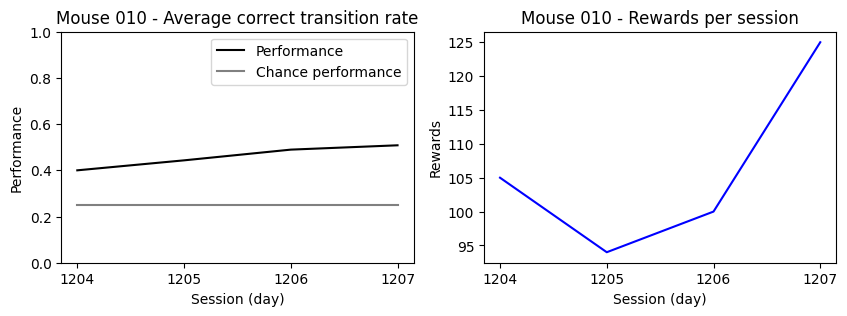

In [37]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(av_performance, color='black')
plt.plot(av_ctrl_performance,color='grey')
plt.ylim([0,1])
plt.xlabel('Session (day)')
plt.ylabel('Performance')
plt.xticks(ticks=range(len(dates)), labels=[dates[i][4:] for i in range(len(dates))])
plt.title(f'Mouse {mouse_id} - Average correct transition rate')
plt.legend(['Performance','Chance performance'])
plt.subplot(1,2,2)
plt.plot(num_rewards, color='blue')
plt.xlabel('Session (day)')
plt.ylabel('Rewards')
plt.xticks(ticks=range(len(dates)), labels=[dates[i][4:] for i in range(len(dates))])
plt.title(f'Mouse {mouse_id} - Rewards per session')

## Sliding window skip rates of individual landmarks

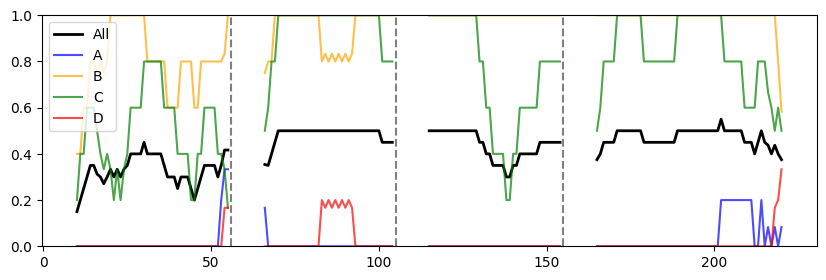

In [32]:
all_cat = np.concatenate(sliding_window_val)
all_cat_a = np.concatenate(sliding_window_a)
all_cat_b = np.concatenate(sliding_window_b)
all_cat_c = np.concatenate(sliding_window_c)
all_cat_d = np.concatenate(sliding_window_d)

plt.figure(figsize=(10,3))
plt.plot(all_cat, color='black', linewidth=2)
plt.plot(all_cat_a, color='blue',alpha=0.7)
plt.plot(all_cat_b, color='orange',alpha=0.7)
plt.plot(all_cat_c, color='green',alpha=0.7)
plt.plot(all_cat_d, color='red',alpha=0.7)
plt.ylim([0,1])
plt.legend(['All', 'A', 'B', 'C', 'D'], loc='upper left')
for edge in np.cumsum(session_edges)[:-1]:
    plt.axvline(x=edge, color='grey', linestyle='--')